In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')
%matplotlib inline

from sklearn.calibration import CalibratedClassifierCV
from sklearn.metrics import accuracy_score, log_loss
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression

In [2]:
df = pd.read_csv('mm_data.csv')
Y = df['result_class']
X = df.drop(columns=['result_class','result_regr'])
X.shape

(1334, 35)

In [3]:
gbc = GradientBoostingClassifier(learning_rate=0.6, max_depth=1, n_estimators=12, random_state=321)
gbc_cal_s = CalibratedClassifierCV(gbc, method='sigmoid', cv=10)
gbc_cal_i = CalibratedClassifierCV(gbc, method='isotonic', cv=10)

gbc.fit(X, Y)
gbc_probs = gbc.predict_proba(X)
gbc_cal_s.fit(X, Y)
gbc_cal_s_probs = gbc_cal_s.predict_proba(X)
gbc_cal_i.fit(X, Y)
gbc_cal_i_probs = gbc_cal_i.predict_proba(X)

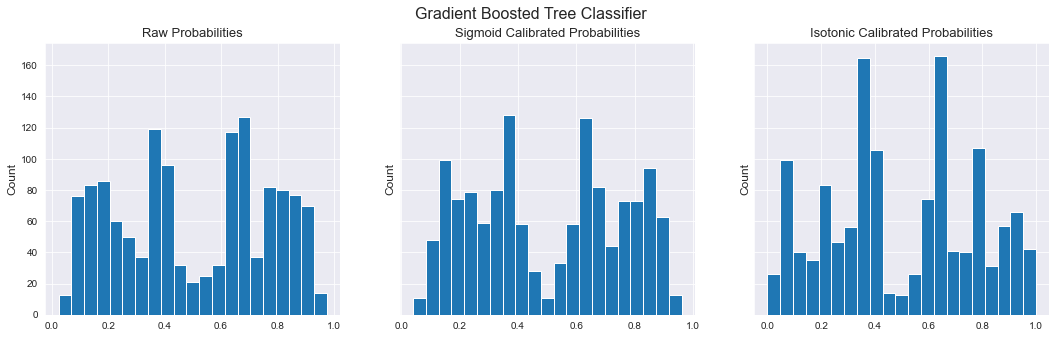

In [17]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, sharey=True, figsize=(18,5))
fig.suptitle('Gradient Boosted Tree Classifier', size=16)
ax1.set_ylabel('Count', size=12)
ax1.set_title('Raw Probabilities', size=13)
_ = ax1.hist(gbc_probs[:,0], bins=21)
ax2.set_ylabel('Count', size=12)
ax2.set_title('Sigmoid Calibrated Probabilities', size=13)
_ = ax2.hist(gbc_cal_s_probs[:,0], bins=21)
ax3.set_ylabel('Count', size=12)
ax3.set_title('Isotonic Calibrated Probabilities', size=13)
_ = ax3.hist(gbc_cal_i_probs[:,0], bins=21)

In [5]:
100*np.round(accuracy_score(gbc_cal_s.predict(X), Y), 3)

75.3

In [6]:
np.round(log_loss(Y, gbc_cal_s.predict_proba(X)), 3)

0.501

In [7]:
lrc = LogisticRegression(l1_ratio=0.5, C=0.15, fit_intercept=False, penalty='elasticnet', solver='saga', max_iter=1000, random_state=321)
cs_lrc = Pipeline(steps=[('center_scale', StandardScaler()), ('lrc', lrc)])
cs_lrc_cal_s = CalibratedClassifierCV(cs_lrc, method='sigmoid', cv=10)
cs_lrc_cal_i = CalibratedClassifierCV(cs_lrc, method='isotonic', cv=10)

cs_lrc.fit(X, Y)
cs_lrc_probs = cs_lrc.predict_proba(X)
cs_lrc_cal_s.fit(X, Y)
cs_lrc_cal_s_probs = cs_lrc_cal_s.predict_proba(X)
cs_lrc_cal_i.fit(X, Y)
cs_lrc_cal_i_probs = cs_lrc_cal_i.predict_proba(X)

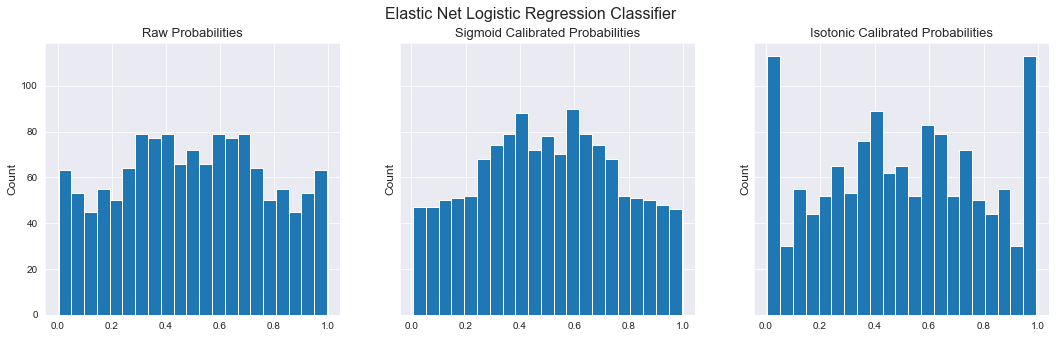

In [14]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, sharey=True, figsize=(18,5))
fig.suptitle('Elastic Net Logistic Regression Classifier', size=16)
ax1.set_ylabel('Count', size=12)
ax1.set_title('Raw Probabilities', size=13)
_ = ax1.hist(cs_lrc_probs[:,0], bins=21)
ax2.set_ylabel('Count', size=12)
ax2.set_title('Sigmoid Calibrated Probabilities', size=13)
_ = ax2.hist(cs_lrc_cal_s_probs[:,0], bins=21)
ax3.set_ylabel('Count', size=12)
ax3.set_title('Isotonic Calibrated Probabilities', size=13)
_ = ax3.hist(cs_lrc_cal_i_probs[:,0], bins=21)

In [9]:
100*np.round(accuracy_score(cs_lrc_cal_s.predict(X), Y), 3)

74.7

In [10]:
np.round(log_loss(Y, cs_lrc_cal_s.predict_proba(X)), 3)

0.507